# Import module

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list]

['NanumGothic',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumSquare',
 'NanumGothic',
 'NanumSquare',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'Nanum Pen Script',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'Nanum Brush Script',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'NanumMyeongjo Eco']

In [6]:
plt.rcParams["font.family"] = 'NanumGothic'

In [20]:
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.t

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [21]:
# mpl.rcParams['axes.unicode_minus'] = False

In [18]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.5.3
설치 위치:  /home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/dhc4003/.config/matplotlib
캐시 위치:  /home/dhc4003/.cache/matplotlib


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Make dataframe

In [12]:
bike_path='data/'
bike_list=os.listdir(bike_path)
df=[]
for file in bike_list:
    file_path=os.path.join(bike_path,file)
    file_name='bike_'+file_path.split('.')[0][-4:]
    file_name=pd.read_csv(file_path,low_memory=False)
    df.append(file_name)

In [13]:
weather_path='weather/'
weather_list=os.listdir(weather_path)
weather_df=[]
for file in weather_list:
    file_path=os.path.join(weather_path,file)
    file_name='weather_'+file_path.split('.')[0][-4:]
    file_name=pd.read_excel(file_path)
    weather_df.append(file_name)

In [14]:
for i in range(5):
    print(weather_df[i].isna().sum())

# bike_df.isnull().sum()

지점            0
지점명           0
일시            0
기온(°C)        0
강수량(mm)    7811
적설(cm)     8381
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        0
강수량(mm)    4012
적설(cm)     4204
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        0
강수량(mm)    7937
적설(cm)     8678
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        1
강수량(mm)    7723
적설(cm)     8576
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        1
강수량(mm)    7854
적설(cm)     8472
시정(10m)       0
dtype: int64


In [28]:
df[2].columns

Index(['대여일시', '대여대여소', '대여대여소이름', '대여거치대', '반납일시', '반납대여소', '반납대여소이름',
       '반납거치대', '이용시간', '이용거리'],
      dtype='object')

In [15]:
df[2]["대여연월"] = df[2]["대여일시"].apply(lambda x : x[:7])
df[2]["반납연월"] = df[2]["반납일시"].apply(lambda x : x[:7])


In [16]:
df[2]["대여일시"]=pd.to_datetime(df[2]["대여일시"])
df[2]["반납일시"]=pd.to_datetime(df[2]["반납일시"])

In [17]:
df[2]["대여연도"] = df[2]["대여일시"].dt.year
df[2]["대여월"] = df[2]["대여일시"].dt.month
df[2]["대여일"] = df[2]["대여일시"].dt.day
df[2]["대여시간"] = df[2]["대여일시"].dt.hour
df[2]["대여요일"] = df[2]["대여일시"].dt.dayofweek
df[2]["대여일자"] = df[2]["대여일시"].dt.date

In [18]:
df[2]["반납연도"] = df[2]["반납일시"].dt.year
df[2]["반납월"] = df[2]["반납일시"].dt.month
df[2]["반납일"] = df[2]["반납일시"].dt.day
df[2]["반납시간"] = df[2]["반납일시"].dt.hour
df[2]["반납요일"] = df[2]["반납일시"].dt.dayofweek
df[2]["반납일자"] = df[2]["반납일시"].dt.date

df[2].sample()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리,...,대여일,대여시간,대여요일,대여일자,반납연도,반납월,반납일,반납시간,반납요일,반납일자
13721100,2020-08-20 08:08:41,254,도림신협 앞,10,2020-08-20 08:12:57,253,신풍역 5번출구 인근,10,3,780.0,...,20,8,3,2020-08-20,2020,8,20,8,3,2020-08-20


<AxesSubplot:xlabel='대여월', ylabel='count'>

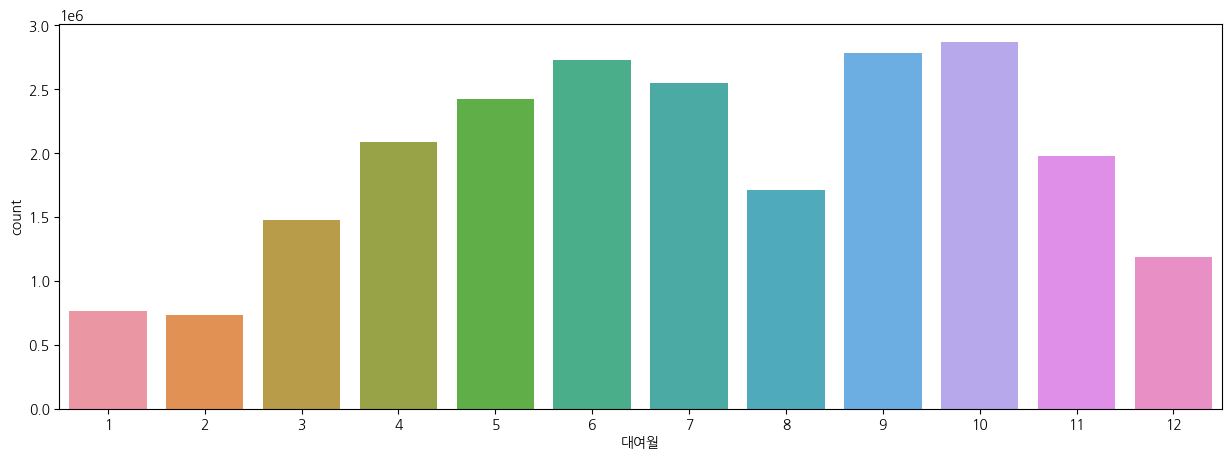

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df[2], x="대여월")

In [32]:
df_rent_group = df[2].groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent_group.head()

대여일자        대여연월     대여연도  대여월  대여일  대여요일
2020-01-01  2020-01  2020  1    1    2       15697
2020-01-02  2020-01  2020  1    2    3       27841
2020-01-03  2020-01  2020  1    3    4       29654
2020-01-04  2020-01  2020  1    4    5       24707
2020-01-05  2020-01  2020  1    5    6       22391
Name: 대여일시, dtype: int64

In [33]:
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

,대여일자,대여연월,대여연도,대여월,대여일,대여요일,대여수
0,2020-01-01,2020-01,2020,1,1,2,15697
1,2020-01-02,2020-01,2020,1,2,3,27841
2,2020-01-03,2020-01,2020,1,3,4,29654
3,2020-01-04,2020-01,2020,1,4,5,24707
4,2020-01-05,2020-01,2020,1,5,6,22391


In [1]:
df[2].hist(figsize = (15,15), bins=25)

NameError: name 'df' is not defined

In [1]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5) ,color='blueviolet')

NameError: name 'df_rent' is not defined

NameError: name 'sns' is not defined

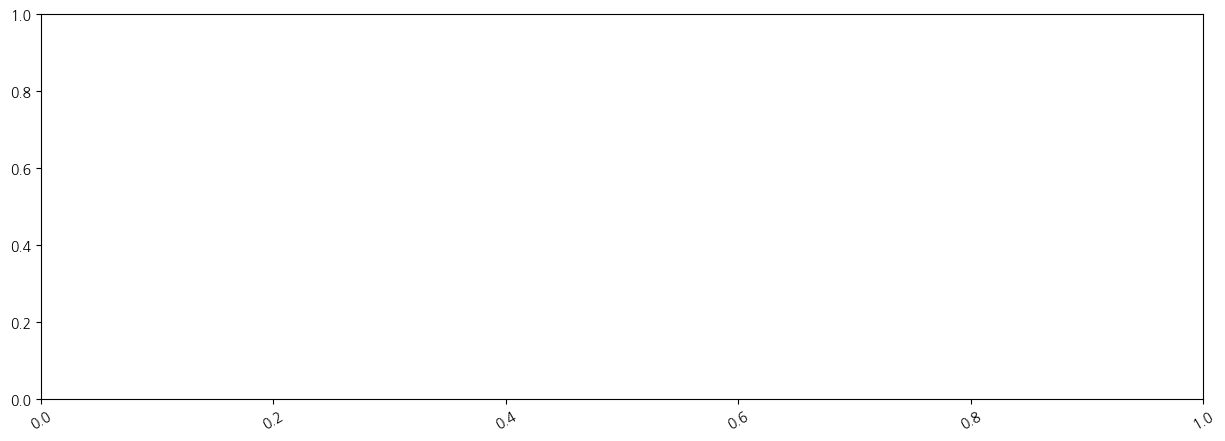

In [8]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")